In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import floor

drop_attribs = [
    "Player Name",             
    "injury_status",           
    "team",                    
    "opp",                     
    "spread",                
    "over_under",              
    "implied_team_score",      
    "L5_dvp_rank",             
    "L5_ppg_floor",            
    "L5_ppg_avg",              
    "L5_ppg_max",              
    "Pos",                    
    "Salary",                  
    "Rest",                    
    "Opp Pace",                
    "Opp DEff",               
    "Opp DvP",                 
    "L2 FGA",                  
    "L5 FGA",               
    "S FGA", 
    "L2 Min",                 
    "L5 Min",                  
    "S Min",                   
    "L5 FP",                   
    "S FP",                    
    "Floor FP",                
    "Ceil FP",                 
    "Actual Min",             
    "Actual FP",               
    "Actual Val",            
    "FantasyFuelPPGProj",      
    "FantasyFuelValueProj", 
    "DFN_PPGProj",      
    "DFN_MinProj",          
    "DFN_ValueProj",          
]

In [426]:
def openBestLineupsForDate():
    file_name = 'BestLineups/2020-02-02'
    file = pd.read_csv(file_name,index_col=[0,1], skipinitialspace=True)
    return file
def openCreatedLineupsForDate():
    file_name = 'BestCreatedLineupsFocused/2020-02-02'
    file = pd.read_csv(file_name,index_col=[0,1], skipinitialspace=True)
    return file

In [427]:
def dropLowScoringLineups(file):
    drop_level = file.groupby(['Lineup Num'])['Actual FP'].sum().mean() - file.groupby(['Lineup Num'])['Actual FP'].sum().std()
    group = file.groupby(['Lineup Num'])
    return group.filter(lambda x: x['Actual FP'].sum() > drop_level)

def plotLineupActualFP(file):
    file.groupby(['Lineup Num'])['Actual FP'].sum().plot(style='.')
    print(file.groupby(['Lineup Num'])['Actual FP'].sum().mean())
    print(file.groupby(['Lineup Num'])['Actual FP'].sum().max())
    
def plotLineupProjectedFP(file, projectionType):
    file.groupby(['Lineup Num'])[projectionType].sum().plot(style='.')
    


In [428]:
actual = openBestLineupsForDate()
created = openCreatedLineupsForDate()

345.44137931034487
378.40000000000003


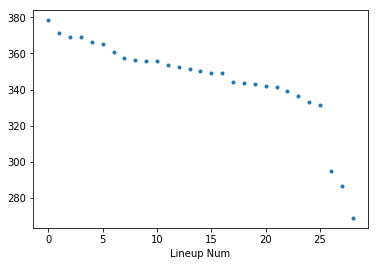

In [429]:
actual = dropLowScoringLineups(actual)
plotLineupActualFP(actual)

279.56666666666666
300.1


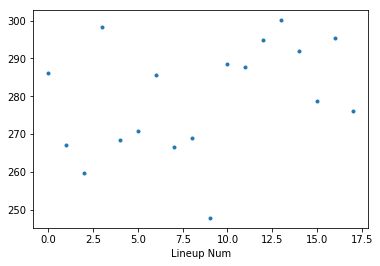

In [430]:
plotLineupActualFP(created)

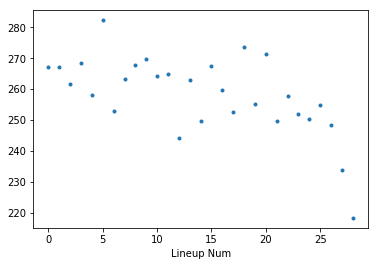

In [431]:
plotLineupProjectedFP(actual, "FantasyFuelPPGProj")

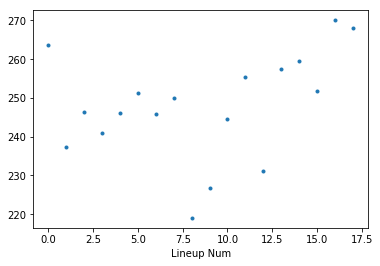

In [432]:
plotLineupProjectedFP(created, 'Avg Proj')

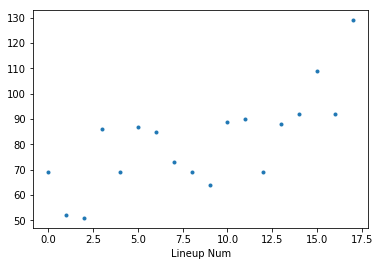

In [433]:
plotLineupProjectedFP(created, 'Selected')

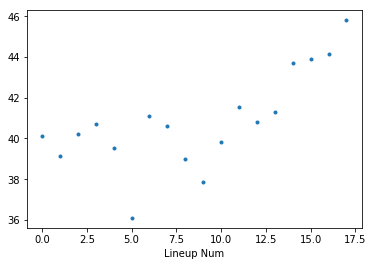

In [434]:
plotLineupProjectedFP(created, 'Avg Value Proj')

In [435]:
actual.loc[0]['Actual FP'].sum()

378.4

In [436]:
created.loc[0]['Actual FP'].sum()

286.1

In [411]:
a = set(actual['Player Name'].value_counts().keys().tolist())
b = set(created['Player Name'].value_counts().keys().tolist())
print(a.intersection(b))

{'Kevin Porter Jr.', 'Cheick Diallo', 'Jaren Jackson Jr.', 'Davis Bertans', 'Buddy Hield', 'Aaron Gordon', "De'Aaron Fox", 'Caris LeVert', 'Draymond Green', 'Deandre Ayton', 'Jayson Tatum', 'Kristaps Porzingis', 'Alec Burks', 'Delon Wright', 'Harrison Barnes'}


In [412]:
a.symmetric_difference(b)

{'Al Horford',
 'Andrew Wiggins',
 'Bogdan Bogdanovic',
 'Brad Wanamaker',
 'Bradley Beal',
 'Brandon Clarke',
 'Bryn Forbes',
 'Cedi Osman',
 'Christian Wood',
 'Cody Martin',
 'Damyean Dotson',
 'DeMar DeRozan',
 'Dennis Smith Jr.',
 'Derrick Jones Jr.',
 'Domantas Sabonis',
 'Doug McDermott',
 'Duncan Robinson',
 'Elfrid Payton',
 'Elie Okobo',
 'Eric Paschall',
 'Jared Harper',
 'Jaylen Brown',
 'Jeff Teague',
 'Jimmy Butler',
 'John Collins',
 'Julius Randle',
 'Karl-Anthony Towns',
 'Kelly Oubre Jr.',
 'Kevin Knox II',
 'Kevin Love',
 'LaMarcus Aldridge',
 'Larry Nance Jr.',
 'Malcolm Brogdon',
 'Malik Monk',
 'Markelle Fultz',
 'Michael Carter-Williams',
 'Mikal Bridges',
 'Mike Scott',
 'Miles Bridges',
 'Mo Bamba',
 'Patty Mills',
 'Paul George',
 'Rodions Kurucs',
 'Rui Hachimura',
 'Spencer Dinwiddie',
 'T.J. McConnell',
 'Thomas Bryant',
 'Trae Young',
 'Willie Cauley-Stein',
 'Wilson Chandler'}

In [413]:
a.difference(b)

{'Brad Wanamaker',
 'Bradley Beal',
 'Bryn Forbes',
 'Cedi Osman',
 'Christian Wood',
 'Dennis Smith Jr.',
 'Derrick Jones Jr.',
 'Domantas Sabonis',
 'Duncan Robinson',
 'Elfrid Payton',
 'Elie Okobo',
 'Eric Paschall',
 'Jared Harper',
 'Jeff Teague',
 'Jimmy Butler',
 'John Collins',
 'Julius Randle',
 'Karl-Anthony Towns',
 'Kelly Oubre Jr.',
 'Kevin Knox II',
 'LaMarcus Aldridge',
 'Larry Nance Jr.',
 'Malcolm Brogdon',
 'Markelle Fultz',
 'Mikal Bridges',
 'Mike Scott',
 'Miles Bridges',
 'Patty Mills',
 'Paul George',
 'Rodions Kurucs',
 'Rui Hachimura',
 'T.J. McConnell',
 'Thomas Bryant',
 'Willie Cauley-Stein',
 'Wilson Chandler'}

In [414]:
actual['Player Name'].value_counts()

Caris LeVert           29
Kristaps Porzingis     27
Deandre Ayton          22
Jeff Teague            21
Bradley Beal           20
Brad Wanamaker         16
Jimmy Butler           15
Mikal Bridges          14
Alec Burks             13
LaMarcus Aldridge       9
Dennis Smith Jr.        9
Aaron Gordon            8
Domantas Sabonis        8
Jayson Tatum            7
Paul George             4
John Collins            3
Cedi Osman              2
Markelle Fultz          2
De'Aaron Fox            2
Harrison Barnes         2
Bryn Forbes             2
Larry Nance Jr.         1
Cheick Diallo           1
Derrick Jones Jr.       1
Rui Hachimura           1
Draymond Green          1
Rodions Kurucs          1
Malcolm Brogdon         1
Kelly Oubre Jr.         1
Duncan Robinson         1
Delon Wright            1
Kevin Porter Jr.        1
Wilson Chandler         1
Patty Mills             1
Karl-Anthony Towns      1
Christian Wood          1
Thomas Bryant           1
Elie Okobo              1
Elfrid Payto

In [416]:
created['Player Name'].value_counts()

Kristaps Porzingis         17
Jayson Tatum               17
Michael Carter-Williams    14
Alec Burks                 13
Mo Bamba                   12
Trae Young                  8
Draymond Green              7
Spencer Dinwiddie           7
De'Aaron Fox                5
Caris LeVert                5
Doug McDermott              5
Cheick Diallo               4
Deandre Ayton               4
Kevin Porter Jr.            3
Kevin Love                  3
Andrew Wiggins              3
Aaron Gordon                2
DeMar DeRozan               2
Jaren Jackson Jr.           2
Buddy Hield                 1
Cody Martin                 1
Davis Bertans               1
Damyean Dotson              1
Harrison Barnes             1
Delon Wright                1
Bogdan Bogdanovic           1
Jaylen Brown                1
Brandon Clarke              1
Malik Monk                  1
Al Horford                  1
Name: Player Name, dtype: int64

In [341]:
created

Player Name  injury_status team  opp  \
Lineup Num Unnamed: 1                                                     
0          0                     Jalen Brunson            NaN  DAL  IND   
           1                 Spencer Dinwiddie            NaN  BKN  PHO   
           2                      Jayson Tatum            NaN  BOS  ATL   
           3                     Cheick Diallo            NaN  PHO  BKN   
           4                        Elie Okobo            NaN  PHO  BKN   
           5                      John Collins            NaN  ATL  BOS   
           6                Kristaps Porzingis            NaN  DAL  IND   
           7                      Caris LeVert            NaN  BKN  PHO   
1          0                      Caris LeVert            NaN  BKN  PHO   
           1                     Jalen Brunson            NaN  DAL  IND   
           2                    Draymond Green            NaN   GS  WAS   
           3                      John Collins            NaN  ATL  BOS   
           4                        Alec Burks            NaN   GS  WAS   
           5                     Cheick Diallo            NaN  PHO  BKN   
           6                Kristaps Porzingis            NaN  DAL  IND   
           7                      Jayson Tatum            NaN  BOS  ATL   
2          0                      Caris LeVert            NaN  BKN  PHO   
           1           Michael Carter-Williams            NaN  ORL  CHA   
           2                      Jayson Tatum            NaN  BOS  ATL   
           3                      John Collins            NaN  ATL  BOS   
           4                 Spencer Dinwiddie            NaN  BKN  PHO   
           5                   Marquese Chriss            NaN   GS  WAS   
           6                     Cheick Diallo            NaN  PHO  BKN   
           7                Kristaps Porzingis            NaN  DAL  IND   
3          0                     Jalen Brunson            NaN  DAL  IND   
           1                 Spencer Dinwiddie            NaN  BKN  PHO   
           2                      Jayson Tatum            NaN  BOS  ATL   
           3                      John Collins            NaN  ATL  BOS   
           4                  Kevin Porter Jr.            NaN  CLE   NY   
           5                   Marquese Chriss            NaN   GS  WAS   
...                                        ...            ...  ...  ...   
11         2                      Caris LeVert            NaN  BKN  PHO   
           3                      John Collins            NaN  ATL  BOS   
           4                    Draymond Green            NaN   GS  WAS   
           5                      Jaylen Brown            NaN  BOS  ATL   
           6                Kristaps Porzingis            NaN  DAL  IND   
           7                     Cheick Diallo            NaN  PHO  BKN   
12         0                 Spencer Dinwiddie            NaN  BKN  PHO   
           1                      Lou Williams            NaN  LAC   SA   
           2                  Tim Hardaway Jr.            NaN  DAL  IND   
           3                     Cheick Diallo            NaN  PHO  BKN   
           4                        Alec Burks            NaN   GS  WAS   
           5                      Caris LeVert            NaN  BKN  PHO   
           6                      John Collins            NaN  ATL  BOS   
           7           Michael Carter-Williams            NaN  ORL  CHA   
13         0                      Lou Williams            NaN  LAC   SA   
           1                     DeMar DeRozan            NaN   SA  LAC   
           2                      Jayson Tatum            NaN  BOS  ATL   
           3                    Brandon Clarke            NaN  MEM  DET   
           4                     Kendrick Nunn            NaN  MIA  PHI   
           5                      Caris LeVert            NaN  BKN  PHO   
           6                     Cheick Diallo            Na

In [102]:
344.3
373.2

245 -> 244
316.7 -> 333


360
386

277 - 291
364 - 367


SyntaxError: invalid syntax (<ipython-input-102-f777b87b0aa6>, line 4)